#  Time Series of Monthly Industrial Food Production


In [ ]:
# Install once if not installed
install.packages("readxl")
install.packages("tseries")
install.packages("forecast")
install.packages("strucchange")

# Load libraries
library(readxl)
library(tseries)
library(forecast)
library(strucchange)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sandwich’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [ ]:
# Read the Excel file (update the name if needed)
data_food <- read_excel("/content/Industrial Production food  S C11.xlsx")

# View column names to find the right one
names(data_food)




[1] "observation_date" "IPG311A2N"

In [ ]:
head(data_food)
str(data_food)
summary(data_food)

observation_date,IPG311A2N
<dttm>,<dbl>
1972-01-01,58.2833
1972-02-01,58.2441
1972-03-01,58.7269
1972-04-01,59.6957
1972-05-01,60.1183
1972-06-01,62.8722


tibble [627 × 2] (S3: tbl_df/tbl/data.frame)
 $ observation_date: POSIXct[1:627], format: "1972-01-01" "1972-02-01" ...
 $ IPG311A2N       : num [1:627] 58.3 58.2 58.7 59.7 60.1 ...


 observation_date                IPG311A2N     
 Min.   :1972-01-01 00:00:00   Min.   : 56.73  
 1st Qu.:1985-01-16 12:00:00   1st Qu.: 75.47  
 Median :1998-02-01 00:00:00   Median : 90.72  
 Mean   :1998-01-30 14:46:30   Mean   : 86.09  
 3rd Qu.:2011-02-15 00:00:00   3rd Qu.: 96.69  
 Max.   :2024-03-01 00:00:00   Max.   :105.37  

In [ ]:
# Create the time series object
data_food.ts<-ts(data_food[[2]], start = c(1972, 1), frequency = 12)

##  Phase 1: Statistical and Graphical Analysis

###  1.  Graphical Analysis – *Chronogramme*

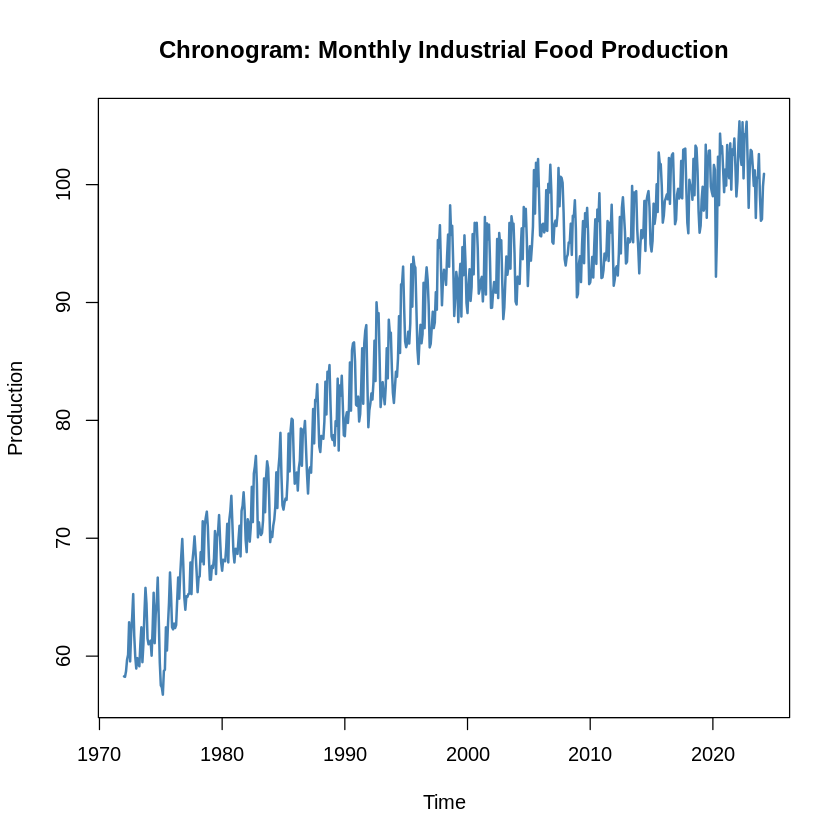

In [ ]:
plot(
  data_food.ts,
  main = "Chronogram: Monthly Industrial Food Production",
  ylab = "Production",
  xlab = "Time",
  col = "steelblue",
  lwd = 2
)


###  Chronogram Interpretation

- **Trend increases** steadily from **1970 to around 2010**.
- **Seasonality** is visible throughout the series.
- From **2010 to 2020**, the trend **stabilizes**.
- A **slight decline** appears after **2020**.


###  2.  Statistical Analysis – Correlogramme (ACF)

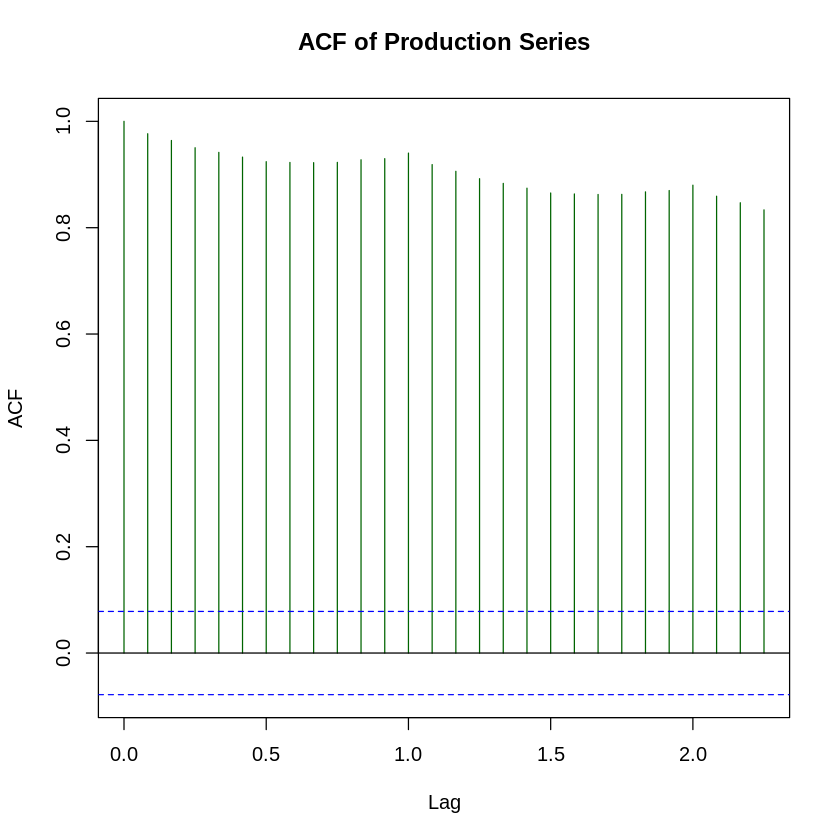

In [ ]:
acf(data_food.ts, main = "ACF of Production Series", col = "darkgreen")

###  ACF Interpretation – Production Series

- The ACF shows **very high autocorrelation** at all lags.
- The bars **decay slowly**, not cutting off quickly.
- This indicates a **strong trend**.




###  3. Structural Decomposition – Additive vs Multiplicative

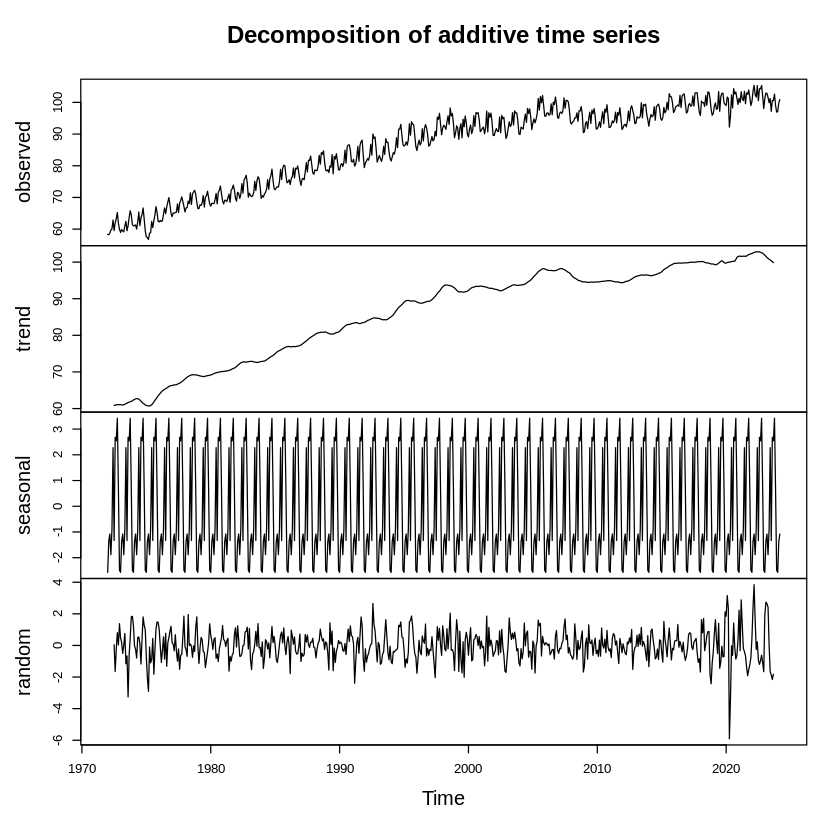

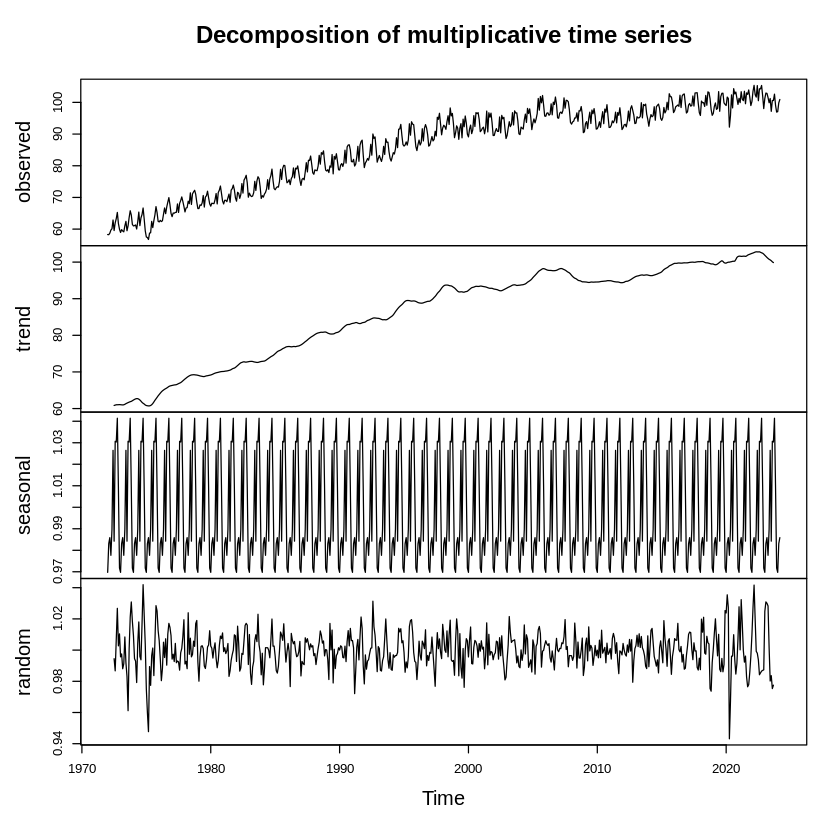

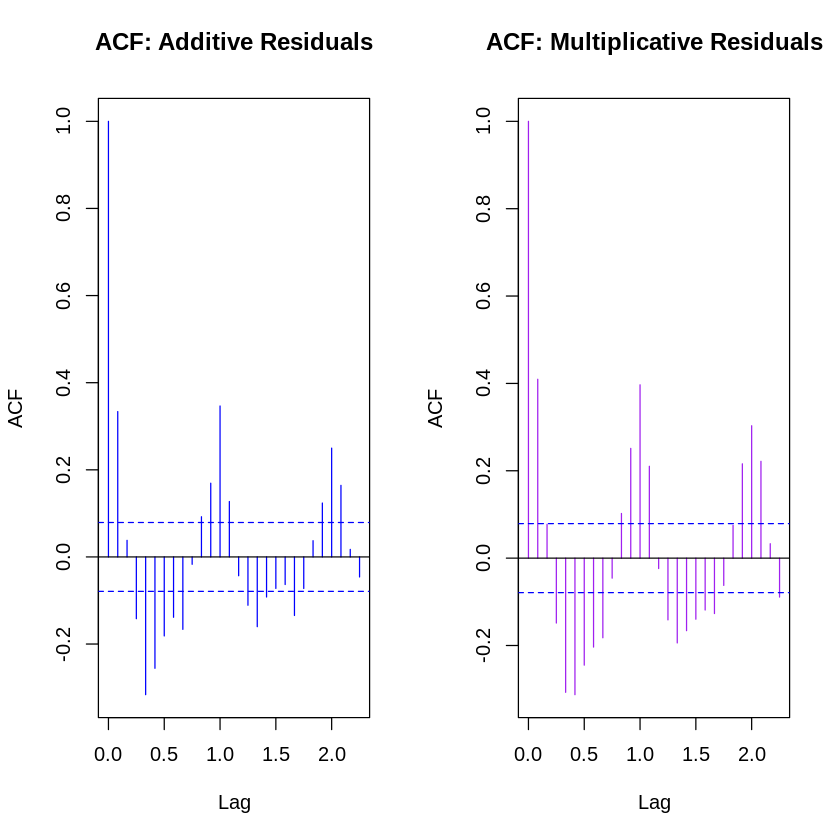

In [ ]:
# Additive decomposition
decomp_add <- decompose(data_food.ts, type = "additive")
plot(decomp_add)

# Multiplicative decomposition
decomp_mult <- decompose(data_food.ts, type = "multiplicative")
plot(decomp_mult)

# Residuals
residuals_add <- na.omit(decomp_add$random)
residuals_mult <- na.omit(decomp_mult$random)

# Compare ACFs of residuals
par(mfrow = c(1, 2))  # Plot side-by-side
acf(residuals_add, main = "ACF: Additive Residuals", col = "blue")
acf(residuals_mult, main = "ACF: Multiplicative Residuals", col = "purple")
par(mfrow = c(1, 1))  # Reset plot layout


###  Interpretation

We conclude that the **loss in the additive model** is less than the one in the **multiplicative model**  
→ **We choose the additive model**.
---

### Let's now move to **Phase 2 – Adjustment of the Time Series** to address this.



##  Phase 2 – Adjustment of the Time Series: Removing Trend and Seasonality




- Modeled the **trend** using a linear and polynomial form.
- Captured **seasonality** using **harmonic (Fourier) terms**.
- Removed trend and seasonality to obtain the **adjusted residual series**.
- Residuals will be used in **Phase 3** for ARIMA modeling.


###  Linear Regression for Trend

In [ ]:
#Trend
tps<-1:length(data_food.ts)
ntps<-(tps-mean(tps))/sd(tps)

In [ ]:
model1<-lm(data_food.ts~ntps)
summary(model1)


Call:
lm(formula = data_food.ts ~ ntps)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9031  -3.2753  -0.2822   2.7337  11.7470 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  86.0906     0.1681  512.21   <2e-16 ***
ntps         12.2596     0.1682   72.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.209 on 625 degrees of freedom
Multiple R-squared:  0.8947,	Adjusted R-squared:  0.8946 
F-statistic:  5312 on 1 and 625 DF,  p-value: < 2.2e-16


In [ ]:
model2<-lm(data_food.ts~ntps+I(ntps^2))
summary(model2)


Call:
lm(formula = data_food.ts ~ ntps + I(ntps^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8501 -2.0509 -0.1142  2.1675  8.2563 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  89.5852     0.1686   531.3   <2e-16 ***
ntps         12.2596     0.1125   109.0   <2e-16 ***
I(ntps^2)    -3.5002     0.1259   -27.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.815 on 624 degrees of freedom
Multiple R-squared:  0.953,	Adjusted R-squared:  0.9528 
F-statistic:  6323 on 2 and 624 DF,  p-value: < 2.2e-16


In [ ]:
model3<-lm(data_food.ts~ntps+I(ntps^2)+I(ntps^3))
summary(model3)


Call:
lm(formula = data_food.ts ~ ntps + I(ntps^2) + I(ntps^3))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8510 -2.0524 -0.1122  2.1675  8.2564 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 89.585199   0.168765 530.828   <2e-16 ***
ntps        12.256510   0.281501  43.540   <2e-16 ***
I(ntps^2)   -3.500200   0.125991 -27.781   <2e-16 ***
I(ntps^3)    0.001722   0.143563   0.012     0.99    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.817 on 623 degrees of freedom
Multiple R-squared:  0.953,	Adjusted R-squared:  0.9528 
F-statistic:  4209 on 3 and 623 DF,  p-value: < 2.2e-16


###  Trend Model Conclusion

- The **quadratic model** has a  **higher R² (0.953)** than the linear and cubic  models
- It also shows **smaller residual errors**.

>  We choose the **quadratic trend model** as it provides a better fit.


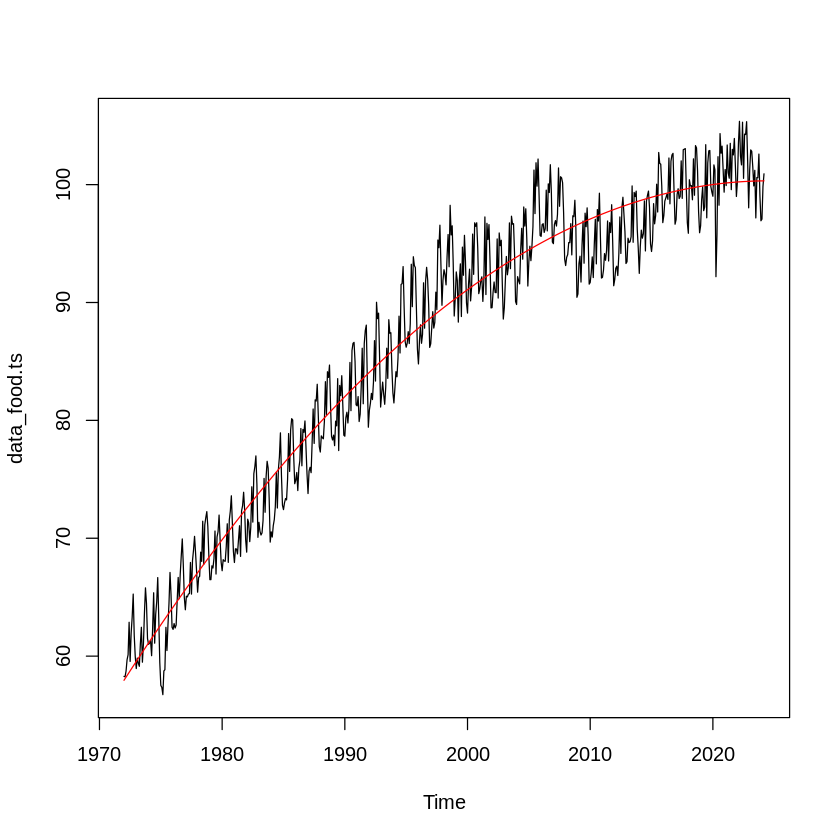

In [ ]:
plot(data_food.ts)
points(time(data_food.ts),fitted(model2),type="l",col="red")

###  Deseasonalization with Harmonic Regression

In [ ]:
MC<-matrix(0,length(data_food.ts),6)
MS<-matrix(0,length(data_food.ts),6)
for(i in 1:6) MC[,i]<-cos(2*pi*tps/(12/i))
for(i in 1:6) MS[,i]<-sin(2*pi*tps/(12/i))

In [ ]:
model4<-lm(data_food.ts~ntps+I(ntps^2)+MC+MS)
summary(model4)


Call:
lm(formula = data_food.ts ~ ntps + I(ntps^2) + MC + MS)

Residuals:
   Min     1Q Median     3Q    Max 
-5.950 -1.319  0.005  1.196  6.157 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.957e+01  1.140e-01 785.714  < 2e-16 ***
ntps         1.226e+01  7.607e-02 161.116  < 2e-16 ***
I(ntps^2)   -3.479e+00  8.513e-02 -40.867  < 2e-16 ***
MC1         -6.485e-01  1.076e-01  -6.028 2.87e-09 ***
MC2         -8.690e-01  1.075e-01  -8.085 3.35e-15 ***
MC3         -1.003e+00  1.076e-01  -9.328  < 2e-16 ***
MC4          3.128e-01  1.075e-01   2.910  0.00375 ** 
MC5         -7.374e-01  1.076e-01  -6.854 1.75e-11 ***
MC6          4.773e-01  9.420e-02   5.067 5.37e-07 ***
MS1         -2.158e+00  1.074e-01 -20.089  < 2e-16 ***
MS2         -5.575e-01  1.075e-01  -5.186 2.92e-07 ***
MS3          1.396e-01  1.075e-01   1.298  0.19469    
MS4         -4.946e-01  1.075e-01  -4.602 5.09e-06 ***
MS5          5.133e-01  1.074e-01   4.779 2.20e-06 ***
MS6          

###  Model Coefficients – Significance Check

We examine the p-values and significance codes of the coefficients:

- Predictors with **p-value > 0.05** are **not statistically significant**.
- These variables **do not contribute meaningfully** to the model and can be removed to simplify the model.

---

###  Variables to Remove:
- **MS3** → p = 0.1947
- **MS6** → p = 0.4817

These predictors do not improve model performance and should be excluded to avoid unnecessary complexity.

 **Conclusion**: We will refine the model by **removing non-significant predictors** (p > 0.05) and re-estimate the model with only significant components.


In [ ]:
model5<-lm(data_food.ts~ntps+I(ntps^2)+MC+MS[,-c(3,6)])
summary(model5)


Call:
lm(formula = data_food.ts ~ ntps + I(ntps^2) + MC + MS[, -c(3, 
    6)])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0220 -1.3093  0.0071  1.1612  6.0036 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     89.57297    0.11403 785.552  < 2e-16 ***
ntps            12.25483    0.07608 161.078  < 2e-16 ***
I(ntps^2)       -3.48008    0.08514 -40.876  < 2e-16 ***
MC1             -0.64849    0.10760  -6.027 2.88e-09 ***
MC2             -0.86936    0.10750  -8.087 3.28e-15 ***
MC3             -1.00352    0.10759  -9.327  < 2e-16 ***
MC4              0.31088    0.10750   2.892  0.00397 ** 
MC5             -0.73895    0.10759  -6.868 1.60e-11 ***
MC6              0.43808    0.07602   5.763 1.31e-08 ***
MS[, -c(3, 6)]1 -2.15819    0.10743 -20.090  < 2e-16 ***
MS[, -c(3, 6)]2 -0.55775    0.10751  -5.188 2.89e-07 ***
MS[, -c(3, 6)]3 -0.49456    0.10750  -4.600 5.13e-06 ***
MS[, -c(3, 6)]4  0.51435    0.10742   4.788 2.11e-06 ***
---
Signif. c

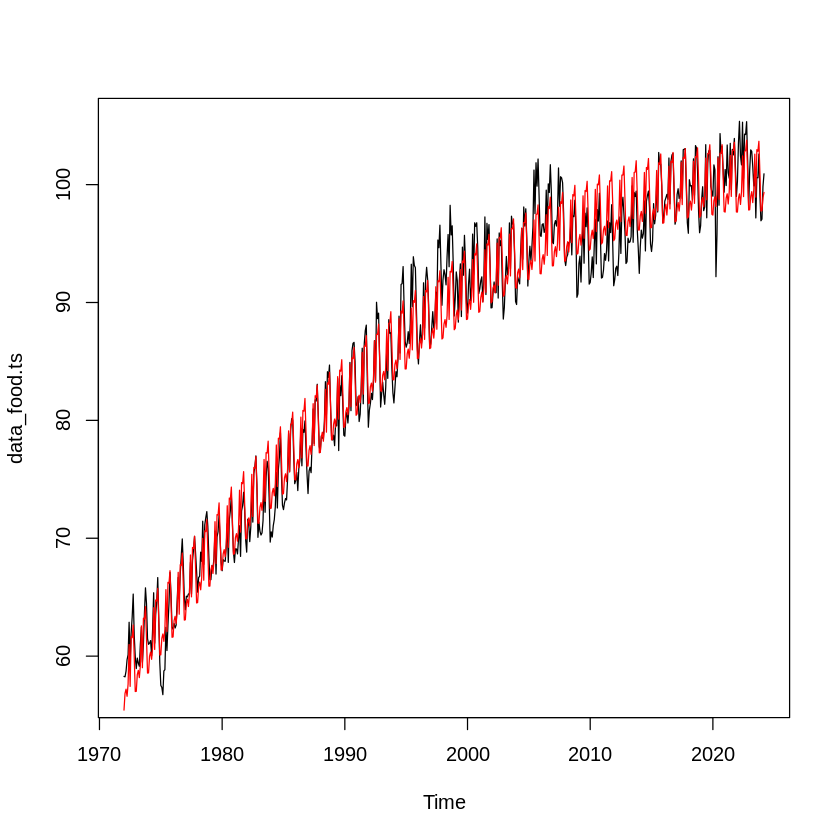

In [ ]:
plot(data_food.ts)
points(time(data_food.ts),fitted(model4),type="l",col="red")

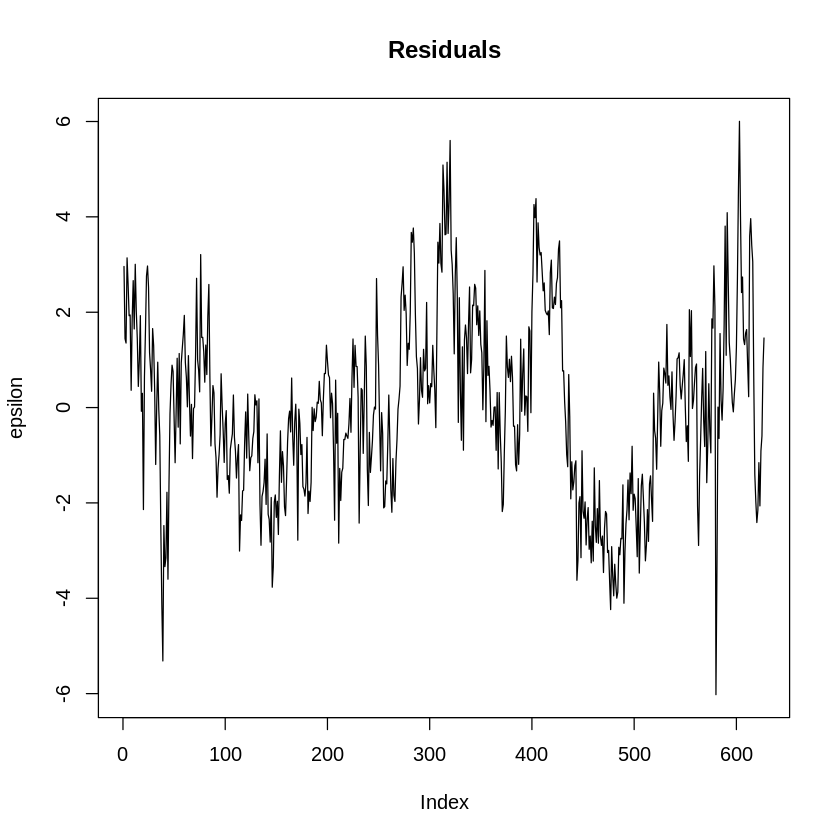

In [ ]:
epsilon <- model5$residuals
plot(epsilon, type = "l", main = "Residuals", ylab = "epsilon", xlab = "Index")

##  Phase 3 – ARIMA Modeling of Residuals

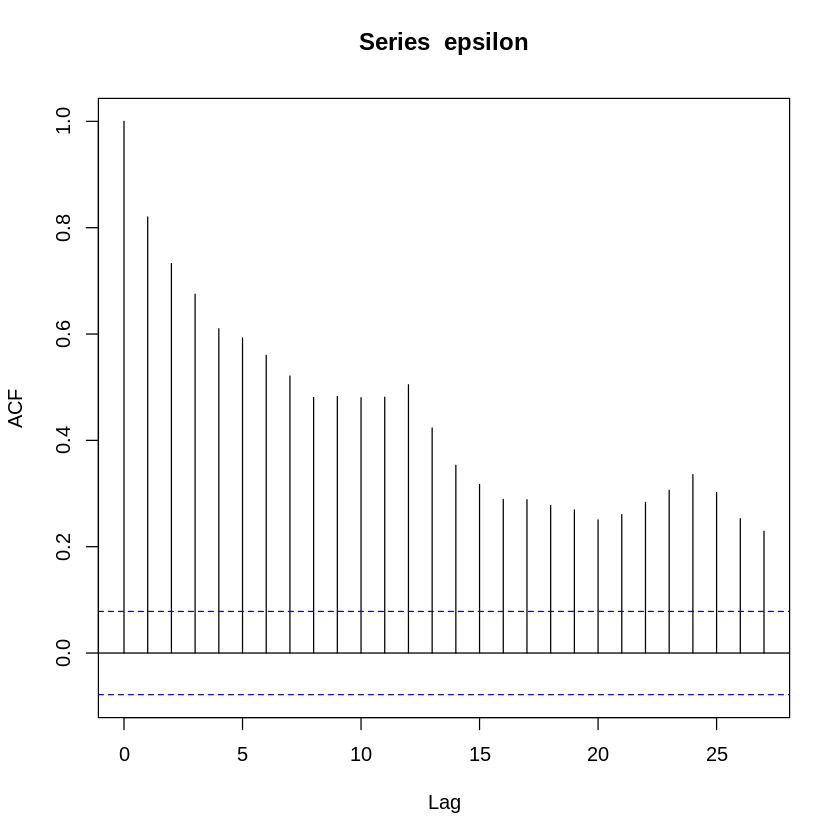

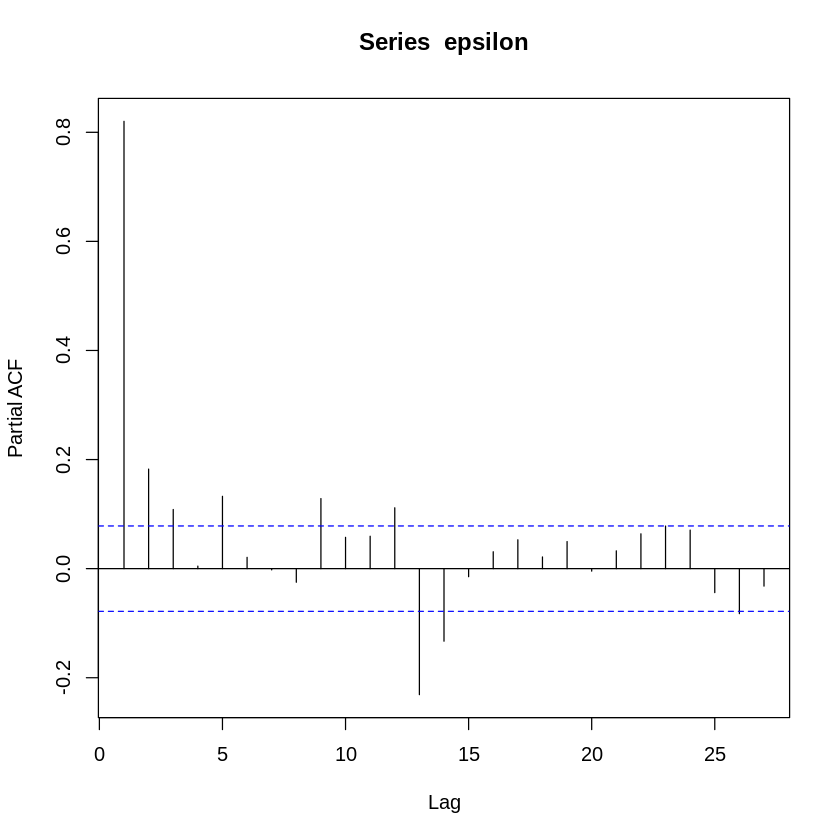

In [ ]:
acf(epsilon)
pacf(epsilon)

According to acf of residuals, they are non stationary so we proceed with differentiation

In [ ]:
epsilon_diff <- diff(epsilon)

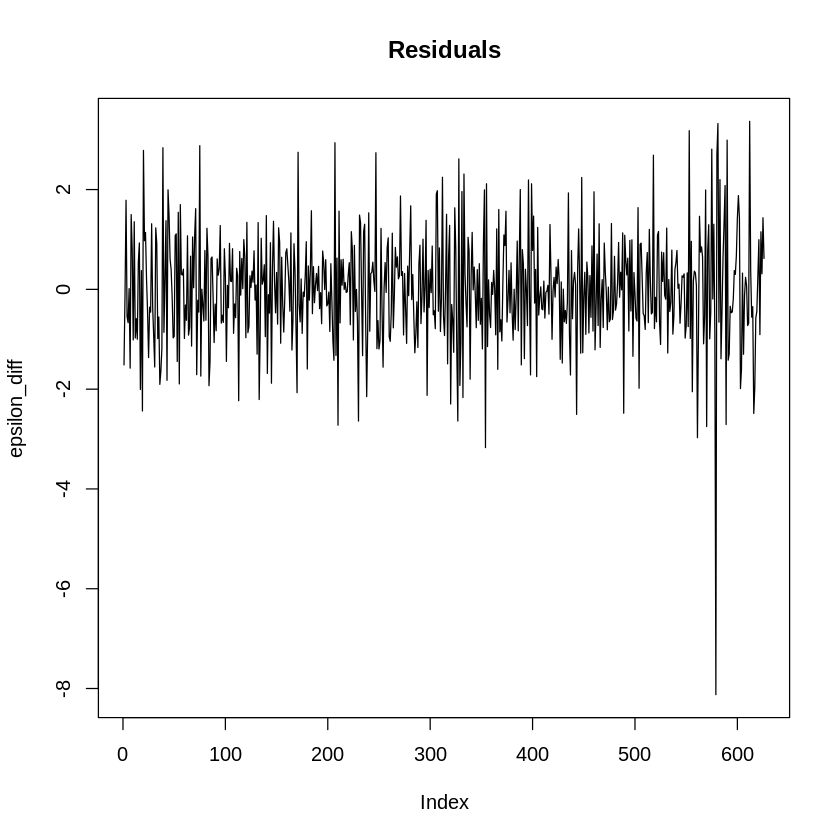

In [ ]:
plot(epsilon_diff, type = "l", main = "Residuals", ylab = "epsilon_diff", xlab = "Index")


In [ ]:
library(tseries)
adf.test(epsilon_diff)

# If p-value < 0.05 → residuals are stationary → d = 0


Warning message in adf.test(epsilon_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  epsilon_diff
Dickey-Fuller = -11.796, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


Since **p < 0.05**, we **reject the null hypothesis** of non-stationarity.

 **Conclusion**: The residuals are **stationary** and suitable for ARIMA modeling.

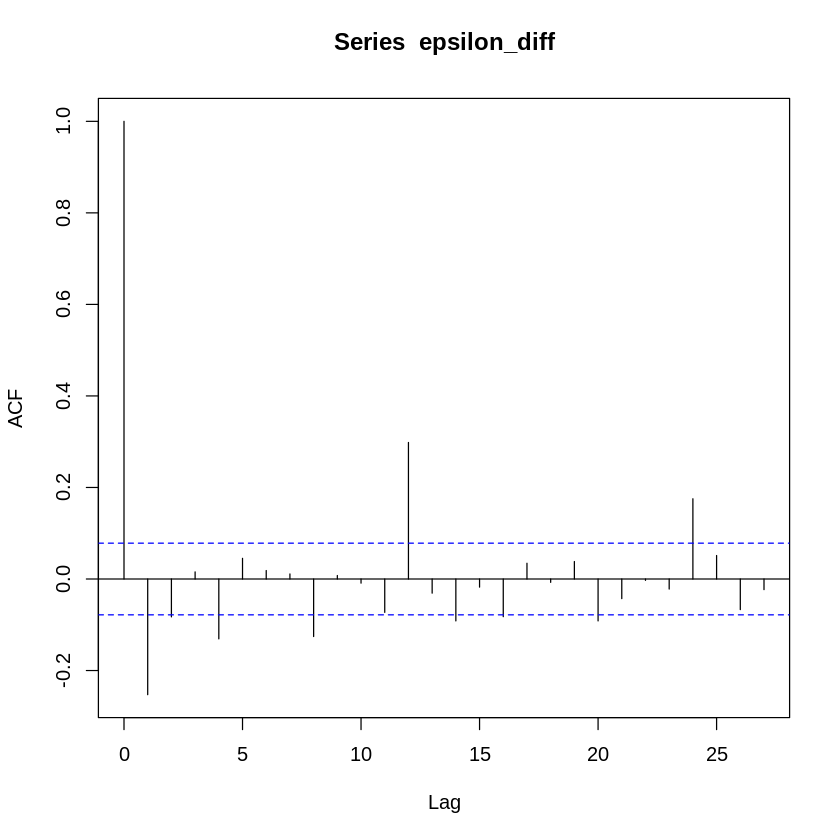

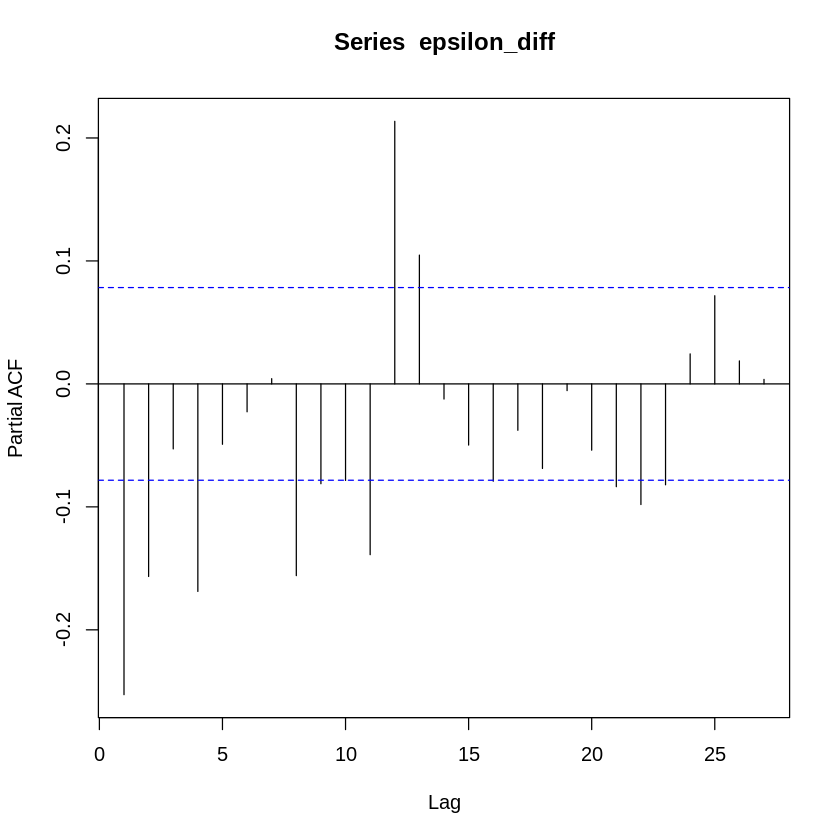

In [ ]:
# Plot ACF and PACF again
acf(epsilon_diff)
pacf(epsilon_diff)

ACF
A strong spike at lag 1, then quickly drops within the confidence bounds.

Minor spikes at lag 10 and 20, but not very strong.

This suggests a MA(1) component is likely.

PACF
One strong spike at lag 1, the rest are mostly within bounds.

Suggests AR(1) might be enough.

The strong spike at lag ~13 looks isolated (could be ignored unless seasonality exists).


###  ARIMA Model Fitting

In [ ]:
model_110 <- Arima(epsilon, order = c(1, 1, 0))
model_011 <- Arima(epsilon, order = c(0, 1, 1))
model_111 <- Arima(epsilon, order = c(1, 1, 1))
model_012 <- Arima(epsilon, order = c(0, 1, 2))
model_112 <- Arima(epsilon, order = c(1, 1, 2))
model_113 <- Arima(epsilon, order = c(1, 1, 3))
model_114 <- Arima(epsilon, order = c(1, 1, 4))
model_212 <- Arima(epsilon, order = c(2, 1, 2))

In [ ]:
summary(model_110)

Series: epsilon 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.2532
s.e.   0.0387

sigma^2 = 1.182:  log likelihood = -940.18
AIC=1884.36   AICc=1884.38   BIC=1893.24

Training set error measures:
                       ME     RMSE       MAE      MPE     MAPE     MASE
Training set -0.003165426 1.085558 0.8238744 148.2731 320.7498 0.965179
                    ACF1
Training set -0.03945941

In [ ]:
summary(model_011)

Series: epsilon 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.3596
s.e.   0.0456

sigma^2 = 1.152:  log likelihood = -932.07
AIC=1868.13   AICc=1868.15   BIC=1877.01

Training set error measures:
                       ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.004517408 1.071516 0.8144692 133.3001 304.0053 0.9541607
                   ACF1
Training set 0.04547544

In [ ]:
summary(model_111)

Series: epsilon 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.5119  -0.8296
s.e.  0.0770   0.0537

sigma^2 = 1.113:  log likelihood = -921.01
AIC=1848.03   AICc=1848.07   BIC=1861.35

Training set error measures:
                      ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.01073698 1.052576 0.7923777 104.5534 272.3361 0.9282802
                    ACF1
Training set -0.02472789

In [ ]:
summary(model_012)

Series: epsilon 
ARIMA(0,1,2) 

Coefficients:
          ma1      ma2
      -0.3382  -0.1681
s.e.   0.0399   0.0459

sigma^2 = 1.129:  log likelihood = -925.48
AIC=1856.97   AICc=1857.01   BIC=1870.29

Training set error measures:
                       ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.007210287 1.060226 0.8033553 101.8234 275.4372 0.9411406
                   ACF1
Training set 0.01076146

In [ ]:
summary(model_112)

Series: epsilon 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1     ma2
      0.7326  -1.0809  0.1539
s.e.  0.1094   0.1227  0.0812

sigma^2 = 1.109:  log likelihood = -919.45
AIC=1846.9   AICc=1846.96   BIC=1864.65

Training set error measures:
                      ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.01113425 1.049877 0.7903277 116.9391 277.8373 0.9258787
                   ACF1
Training set 0.00286843

In [ ]:
summary(model_113)

Series: epsilon 
ARIMA(1,1,3) 

Coefficients:
         ar1      ma1     ma2     ma3
      0.8390  -1.1842  0.1602  0.0592
s.e.  0.1454   0.1530  0.0727  0.0774

sigma^2 = 1.11:  log likelihood = -919.15
AIC=1848.31   AICc=1848.4   BIC=1870.5

Training set error measures:
                      ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.01158573 1.049315 0.7902792 112.7939 273.2699 0.9258218
                     ACF1
Training set 2.258129e-05

In [ ]:
summary(model_114)

Series: epsilon 
ARIMA(1,1,4) 

Coefficients:
          ar1      ma1      ma2      ma3      ma4
      -0.2075  -0.1263  -0.1929  -0.0620  -0.1740
s.e.   0.2285   0.2254   0.0843   0.0519   0.0423

sigma^2 = 1.103:  log likelihood = -916.77
AIC=1845.54   AICc=1845.68   BIC=1872.18

Training set error measures:
                      ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.01050591 1.045436 0.7888636 106.5144 272.7728 0.9241634
                     ACF1
Training set 0.0003329516

In [ ]:
summary(model_212)

Series: epsilon 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.3806  -0.4051  -1.7277  0.7277
s.e.  0.1127   0.1022   0.0944  0.0944

sigma^2 = 1.099:  log likelihood = -917.24
AIC=1844.47   AICc=1844.57   BIC=1866.67

Training set error measures:
                      ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.03047408 1.044007 0.784672 108.5799 261.7752 0.9192529
                  ACF1
Training set -0.011072

Best Model: ARIMA(1,1,4)
Reasons:
Very low AIC (only 1 point higher than ARIMA(2,1,2))

Excellent residual diagnostics: ACF1 ≈ 0.0003

RMSE, MAE very close to best

Coefficients are all reasonable


	Ljung-Box test

data:  Residuals from ARIMA(1,1,4)
Q* = 6.969, df = 5, p-value = 0.223

Model df: 5.   Total lags used: 10



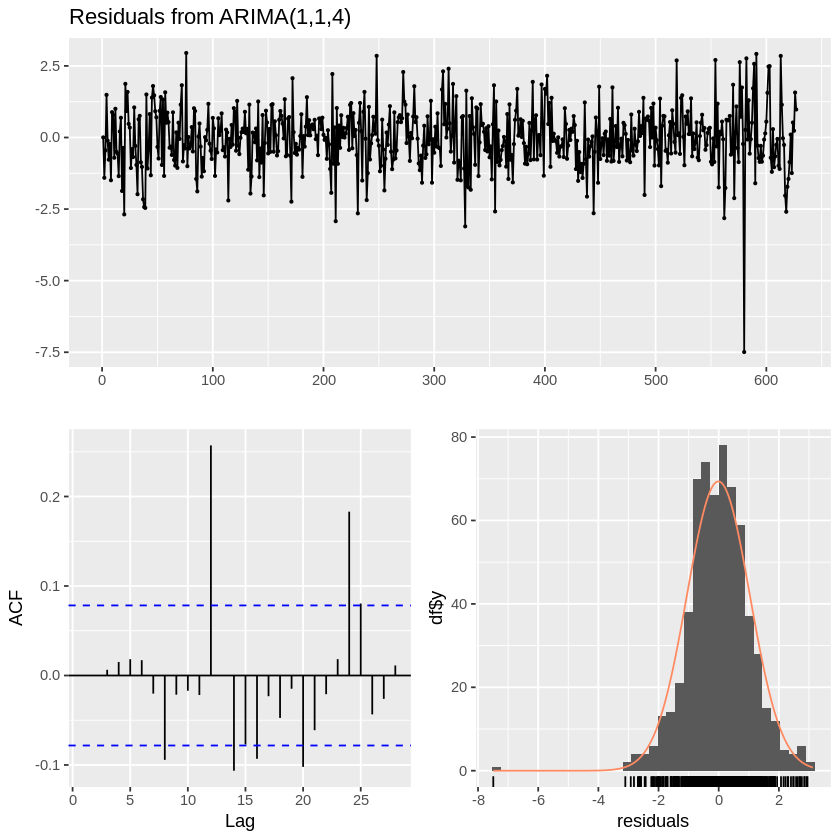

In [ ]:
checkresiduals(model_114)

Interpretation:
p-value = 0.223 > 0.05 → Residuals are white noise.

No significant autocorrelation remains.

 **Conclusion**: Model is statistically valid and passes all diagnostic checks and All phases were successfully completed


 The final ARIMA model is well-fitted and ready for **forecasting**.